In [18]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [19]:
!ls /content/gdrive/My\ Drive/*.py

'/content/gdrive/My Drive/HodaDatasetReader.py'


In [20]:
!cat '/content/gdrive/My Drive/HodaDatasetReader.py'

# *-* coding: utf-8 *-*

# Hoda Dataset Reader
# Python code for reading Hoda farsi digit dataset.

# Hoda Farsi Digit Dataset:
# http://farsiocr.ir/
# http://farsiocr.ir/مجموعه-داده/مجموعه-ارقام-دستنویس-هدی
# http://dadegan.ir/catalog/hoda

# Repository:
# https://github.com/amir-saniyan/HodaDatasetReader

import struct
import numpy as np
import cv2


def __convert_to_one_hot(vector, num_classes):
    result = np.zeros(shape=[len(vector), num_classes])
    result[np.arange(len(vector)), vector] = 1
    return result


def __resize_image(src_image, dst_image_height, dst_image_width):
    src_image_height = src_image.shape[0]
    src_image_width = src_image.shape[1]

    if src_image_height > dst_image_height or src_image_width > dst_image_width:
        height_scale = dst_image_height / src_image_height
        width_scale = dst_image_width / src_image_width
        scale = min(height_scale, width_scale)
        img = cv2.resize(src=src_image, dsize=(0, 0), fx=scale, fy=scale, interpol

In [21]:
import sys
sys.path.append('/content/gdrive/My Drive')

In [22]:
import HodaDatasetReader

In [23]:
from tensorflow import keras
from matplotlib import pyplot as plt
import numpy as np
import cv2 
from HodaDatasetReader import read_hoda_dataset

In [24]:
# load dataset
print('Reading train dataset (Train 60000.cdb)...')
x_train, y_train = read_hoda_dataset(dataset_path='/content/gdrive/My Drive/DigitDB/Train 60000.cdb',
                                images_height=32,
                                images_width=32,
                                one_hot=False,
                                reshape=False)

print('Reading test dataset (Test 20000.cdb)...')
x_test, y_test = read_hoda_dataset(dataset_path='/content/gdrive/My Drive/DigitDB/Test 20000.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=False)

print('Reading remaining dataset...')
x_valid, y_valid = read_hoda_dataset(dataset_path='/content/gdrive/My Drive/DigitDB/RemainingSamples.cdb',
                              images_height=32,
                              images_width=32,
                              one_hot=False,
                              reshape=False)

Reading train dataset (Train 60000.cdb)...
Reading test dataset (Test 20000.cdb)...
Reading remaining dataset...


In [25]:
# Convert class vectors to binary class matrices.
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [30]:
# define model
model = keras.Sequential()
model.add(keras.layers.Input(shape=x_train[0].shape))
model.add(keras.layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Conv2D(filters=128, kernel_size=(5, 5), activation='relu'))
model.add(keras.layers.MaxPool2D())
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(units=120, activation='relu'))
model.add(keras.layers.Dense(units=84, activation='relu'))
model.add(keras.layers.Dense(units=num_classes, activation='softmax'))

model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 28, 28, 128)       3328      
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 14, 14, 128)       0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 10, 10, 128)       409728    
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 5, 5, 128)         0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 3200)              0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               384120    
_________________________________________________________________
dense_13 (Dense)             (None, 84)               

In [33]:
# compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# train model
history = model.fit(x_train, y_train,
                    batch_size=100,
                    epochs=20,
                    validation_data=(x_test, y_test),
                    shuffle=True)

Epoch 1/20
600/600 [==============================] - 435s 725ms/step - loss: 0.0295 - accuracy: 0.9904 - val_loss: 0.0425 - val_accuracy: 0.9862
Epoch 2/20
600/600 [==============================] - 429s 716ms/step - loss: 0.0120 - accuracy: 0.9961 - val_loss: 0.0313 - val_accuracy: 0.9912
Epoch 3/20
600/600 [==============================] - 428s 714ms/step - loss: 0.0073 - accuracy: 0.9976 - val_loss: 0.0440 - val_accuracy: 0.9876
Epoch 4/20
600/600 [==============================] - 428s 714ms/step - loss: 0.0063 - accuracy: 0.9980 - val_loss: 0.0401 - val_accuracy: 0.9900
Epoch 5/20
600/600 [==============================] - 428s 713ms/step - loss: 0.0054 - accuracy: 0.9984 - val_loss: 0.0306 - val_accuracy: 0.9912
Epoch 6/20
600/600 [==============================] - 428s 713ms/step - loss: 0.0051 - accuracy: 0.9984 - val_loss: 0.0295 - val_accuracy: 0.9930
Epoch 7/20
600/600 [==============================] - 432s 720ms/step - loss: 0.0025 - accuracy: 0.9992 - val_loss: 0.0355 -

accuracy is: 0.99405
###################################################
[[1994    0    0    0    1    3    0    1    0    1]
 [   0 1995    0    0    1    0    0    0    1    3]
 [   0    4 1983    3    2    0    3    2    0    3]
 [   0    0   27 1958   14    1    0    0    0    0]
 [   1    0    5    5 1986    0    2    0    0    1]
 [   4    0    1    0    2 1993    0    0    0    0]
 [   0    0    0    0    1    3 1989    2    0    5]
 [   0    1    0    0    0    0    0 1999    0    0]
 [   0    0    0    0    1    1    0    0 1998    0]
 [   0    3    0    0    1    3    6    0    1 1986]]
###################################################
[[0.997 0.    0.    0.    0.    0.002 0.    0.    0.    0.   ]
 [0.    0.998 0.    0.    0.    0.    0.    0.    0.    0.002]
 [0.    0.002 0.992 0.002 0.001 0.    0.002 0.001 0.    0.002]
 [0.    0.    0.014 0.979 0.007 0.    0.    0.    0.    0.   ]
 [0.    0.    0.002 0.002 0.993 0.    0.001 0.    0.    0.   ]
 [0.002 0.    0.    0.    0.0

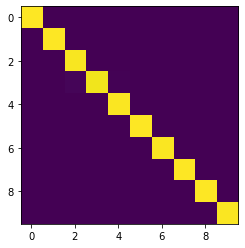

In [35]:
# predict
y_pred = model.predict(x_test)

# evaluation
import sklearn.metrics

y_pred = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# accuracy
acc = sklearn.metrics.accuracy_score(y_true, y_pred, normalize=True)
print("accuracy is:",acc)
print("###################################################")

# plot confusion matrix
conf = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize=None)
plt.imshow(conf)
print(conf)
print("###################################################")
conf_norm = sklearn.metrics.confusion_matrix(y_true, y_pred, normalize='true')
print(np.round(conf_norm, 3))

0 => 5
[0.001 0.    0.    0.001 0.383 0.615 0.    0.    0.    0.   ]


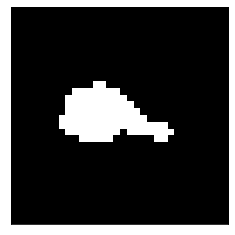

0 => 4
[0.457 0.    0.    0.001 0.542 0.001 0.    0.    0.    0.   ]


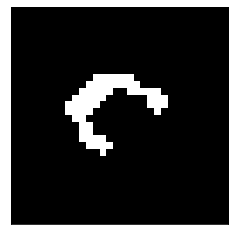

0 => 5
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


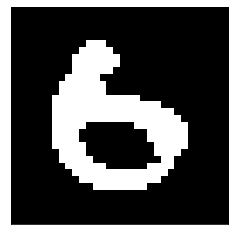

0 => 5
[0.46 0.   0.   0.   0.   0.54 0.   0.   0.   0.  ]


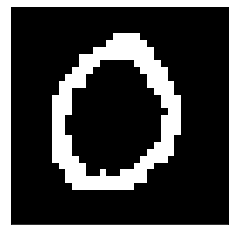

0 => 9
[0.006 0.    0.    0.    0.    0.    0.    0.    0.    0.994]


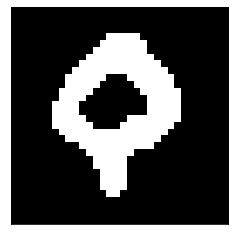

0 => 7
[0.179 0.041 0.    0.004 0.    0.307 0.024 0.436 0.004 0.005]


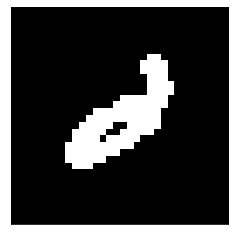

1 => 9
[0.    0.004 0.    0.    0.    0.    0.    0.    0.    0.996]


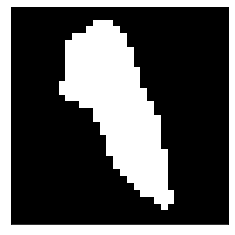

1 => 8
[0.    0.001 0.    0.    0.    0.    0.045 0.    0.954 0.   ]


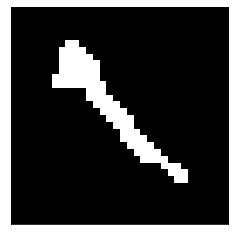

In [36]:
# show errors
y_pred = model.predict(x_test)

idx = np.where(np.argmax(y_pred, axis=1) != np.argmax(y_test, axis=1))[0]

for i in idx[:8]:
  print('{} => {}'.format(np.argmax(y_test[i]), np.argmax(y_pred[i])))
  print(np.round(y_pred[i], 3))
  plt.figure()
  plt.imshow(x_test[i][..., 0], cmap='gray')
  plt.xticks([])
  plt.yticks([])
  plt.show()